In [1]:
#importing Libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Preprocessing
from sklearn.impute import SimpleImputer

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
#load the dataset
stc = pd.read_csv("HandestsSTC.csv")

In [3]:
stc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   CAL_DT            1048575 non-null  object
 1   MODEL_NAME        1048575 non-null  object
 2   BRAND_FULL_NAME   1048575 non-null  object
 3   BRAND_NAME        1048575 non-null  object
 4   VENDOR_NAME       1048575 non-null  object
 5   OS_NAME           1048575 non-null  object
 6   DEVICE_TYPE       1048575 non-null  object
 7   _2G_FLG           1048575 non-null  object
 8   _3G_FLG           1048575 non-null  object
 9   _4G_FLG           1048575 non-null  object
 10  WIFI_FLG          1048575 non-null  object
 11  BLUETOOTH_FLG     1048575 non-null  object
 12  TOUCH_SCREEN_FLG  1048575 non-null  object
 13  DUAL_SIM_FLG      1048575 non-null  object
 14  GENDER_TYPE_CD    939245 non-null   object
 15  AGE_B             1048575 non-null  object
 16  NATIONALITY_CD    

In [4]:
#sum null values for each column 
stc.isna().sum()

CAL_DT                   0
MODEL_NAME               0
BRAND_FULL_NAME          0
BRAND_NAME               0
VENDOR_NAME              0
OS_NAME                  0
DEVICE_TYPE              0
_2G_FLG                  0
_3G_FLG                  0
_4G_FLG                  0
WIFI_FLG                 0
BLUETOOTH_FLG            0
TOUCH_SCREEN_FLG         0
DUAL_SIM_FLG             0
GENDER_TYPE_CD      109330
AGE_B                    0
NATIONALITY_CD      122866
NATIONALITY_NAME    122642
SAUDI_NON_SAUDI        493
DEVICE_COUNT           489
dtype: int64

In [5]:
stc.describe()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,939245,1048575,925709,925933,1048082,1048086
unique,24,825,1061,205,114,15,6,6,6,5,6,4,4,3,4,8,206,210,43,2078
top,6/30/2019,One x9,Pro Edition,Nokia,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,IND,India,Non-Saudi,1
freq,50969,1712,2337,249867,619471,619471,707772,1042229,721128,572605,731780,966535,700537,744691,653638,306523,77367,77367,908116,473326


In [6]:
stc.describe(exclude='number')

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,939245,1048575,925709,925933,1048082,1048086
unique,24,825,1061,205,114,15,6,6,6,5,6,4,4,3,4,8,206,210,43,2078
top,6/30/2019,One x9,Pro Edition,Nokia,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,IND,India,Non-Saudi,1
freq,50969,1712,2337,249867,619471,619471,707772,1042229,721128,572605,731780,966535,700537,744691,653638,306523,77367,77367,908116,473326


In [7]:
#create copy of the data
stc_d=stc.copy()

In [8]:
#sum of the duplicated values
stc_d.duplicated().sum()

2293

In [9]:
#drop duplicated values
stc_d.drop_duplicates(inplace=True)

In [10]:
stc_d.duplicated().sum()

0

In [11]:
#drop null values
stc_d.dropna(axis=0,inplace=True)

In [12]:
#sum of null values for each column
stc_d.isna().sum()

CAL_DT              0
MODEL_NAME          0
BRAND_FULL_NAME     0
BRAND_NAME          0
VENDOR_NAME         0
OS_NAME             0
DEVICE_TYPE         0
_2G_FLG             0
_3G_FLG             0
_4G_FLG             0
WIFI_FLG            0
BLUETOOTH_FLG       0
TOUCH_SCREEN_FLG    0
DUAL_SIM_FLG        0
GENDER_TYPE_CD      0
AGE_B               0
NATIONALITY_CD      0
NATIONALITY_NAME    0
SAUDI_NON_SAUDI     0
DEVICE_COUNT        0
dtype: int64

In [13]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836526 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CAL_DT            836526 non-null  object
 1   MODEL_NAME        836526 non-null  object
 2   BRAND_FULL_NAME   836526 non-null  object
 3   BRAND_NAME        836526 non-null  object
 4   VENDOR_NAME       836526 non-null  object
 5   OS_NAME           836526 non-null  object
 6   DEVICE_TYPE       836526 non-null  object
 7   _2G_FLG           836526 non-null  object
 8   _3G_FLG           836526 non-null  object
 9   _4G_FLG           836526 non-null  object
 10  WIFI_FLG          836526 non-null  object
 11  BLUETOOTH_FLG     836526 non-null  object
 12  TOUCH_SCREEN_FLG  836526 non-null  object
 13  DUAL_SIM_FLG      836526 non-null  object
 14  GENDER_TYPE_CD    836526 non-null  object
 15  AGE_B             836526 non-null  object
 16  NATIONALITY_CD    836526 non-null  ob

In [14]:
#Unique values with its counts for each column 
for elem in stc_d.columns[1:]:
    print(stc_d[elem].value_counts())
    print("\n")

K7 SPARK        1528
6700 Classic    1523
X2-00           1493
1110            1491
C7-00           1484
                ... 
Droid Ultra       19
Mi A2 Lite        15
5217              11
x1                10
P8                 7
Name: MODEL_NAME, Length: 825, dtype: int64


Pro Edition           1940
Tecno K7 SPARK        1528
Nokia 6700 Classic    1523
Nokia X2-00           1493
Nokia 1110            1491
                      ... 
AGM M2                   1
Gee Pee 6230             1
AVVIO L800               1
Positivo P70             1
Vell-Com M2              1
Name: BRAND_FULL_NAME, Length: 1058, dtype: int64


Nokia       203251
Lenovo       48873
Sony         45870
LG           43986
HTC          42968
             ...  
AVVIO            1
Gee Pee          1
Siemens          1
Anoking          1
Positivo         1
Name: BRAND_NAME, Length: 203, dtype: int64


Google         493199
Nokia          149981
Symbian LTD     29922
Alcatel         12612
RIM             12275
         

In [15]:
# drop irrelevant data in GENDER_TYPE_CD column 
stc_d.drop(stc_d[(stc_d['GENDER_TYPE_CD']=='Y') |(stc_d['GENDER_TYPE_CD']== 'N')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [16]:
# drop irrelevant data in NATIONALITY_CD and AGE_B columns 
stc_d.drop(stc_d[(stc_d['AGE_B']=='Y') | (stc_d['AGE_B']== 'N') | (stc_d['AGE_B']== 'NA   ')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [17]:
# drop irrelevant data in NATIONALITY_CD and AGE_B columns 
stc_d.drop(stc_d[(stc_d['NATIONALITY_CD']=='Female') | (stc_d['AGE_B']== 'N') | (stc_d['NATIONALITY_CD']== 'Male')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [18]:
# drop irrelevant data in NATIONALITY_NAME column 
stc_d.drop(stc_d[(stc_d['NATIONALITY_NAME']=='18-25') | (stc_d['NATIONALITY_NAME']== '<18  ') | (stc_d['NATIONALITY_NAME']== 'N') | (stc_d['NATIONALITY_NAME']== 'NA   ')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [19]:
# drop irrelevant data in SAUDI_NON_SAUDI column 
stc_d.drop(stc_d[(stc_d['SAUDI_NON_SAUDI']=='Male') | (stc_d['SAUDI_NON_SAUDI']== 'Female') | (stc_d['SAUDI_NON_SAUDI']== 'N')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [20]:
# drop irrelevant data in CAL_DT column 
stc_d["CAL_DT"]=pd.to_datetime(stc_d["CAL_DT"]).dt.strftime('%Y')

In [21]:
stc_d.head()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21


### Drop Unuseful columns

In [22]:
# Drop BRAND_FULL_NAME column
stc_d.drop(columns="BRAND_FULL_NAME",axis=1,inplace=True)

In [23]:
# Drop NATIONALITY_CD column
stc_d.drop(columns="NATIONALITY_CD",axis=1,inplace=True)

### Change Datatype 


In [24]:
# change the datatype of CAL_DT column to date datatype
stc_d["CAL_DT"]=pd.to_datetime(stc_d["CAL_DT"])

In [25]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714023 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CAL_DT            714023 non-null  datetime64[ns]
 1   MODEL_NAME        714023 non-null  object        
 2   BRAND_NAME        714023 non-null  object        
 3   VENDOR_NAME       714023 non-null  object        
 4   OS_NAME           714023 non-null  object        
 5   DEVICE_TYPE       714023 non-null  object        
 6   _2G_FLG           714023 non-null  object        
 7   _3G_FLG           714023 non-null  object        
 8   _4G_FLG           714023 non-null  object        
 9   WIFI_FLG          714023 non-null  object        
 10  BLUETOOTH_FLG     714023 non-null  object        
 11  TOUCH_SCREEN_FLG  714023 non-null  object        
 12  DUAL_SIM_FLG      714023 non-null  object        
 13  GENDER_TYPE_CD    714023 non-null  object        
 14  AGE

In [26]:
# change the datatype of DEVICE_COUNT column to int datatype
stc_d["DEVICE_COUNT"]=stc_d["DEVICE_COUNT"].astype(str).astype(int)

In [27]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714023 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CAL_DT            714023 non-null  datetime64[ns]
 1   MODEL_NAME        714023 non-null  object        
 2   BRAND_NAME        714023 non-null  object        
 3   VENDOR_NAME       714023 non-null  object        
 4   OS_NAME           714023 non-null  object        
 5   DEVICE_TYPE       714023 non-null  object        
 6   _2G_FLG           714023 non-null  object        
 7   _3G_FLG           714023 non-null  object        
 8   _4G_FLG           714023 non-null  object        
 9   WIFI_FLG          714023 non-null  object        
 10  BLUETOOTH_FLG     714023 non-null  object        
 11  TOUCH_SCREEN_FLG  714023 non-null  object        
 12  DUAL_SIM_FLG      714023 non-null  object        
 13  GENDER_TYPE_CD    714023 non-null  object        
 14  AGE

### Label Encoder

In [28]:
# LabelEncoder
le = preprocessing.LabelEncoder()
stc_d["2G_FLG"]=le.fit_transform(stc_d["_2G_FLG"])
stc_d["3G_FLG"]=le.fit_transform(stc_d["_3G_FLG"])
stc_d["4G_FLG"]=le.fit_transform(stc_d["_4G_FLG"])
stc_d["WIFI"]=le.fit_transform(stc_d["WIFI_FLG"])
stc_d["BLUETOOTH"]=le.fit_transform(stc_d["BLUETOOTH_FLG"])
stc_d["TOUCH_SCREEN"]=le.fit_transform(stc_d["TOUCH_SCREEN_FLG"])
stc_d["DUAL_SIM"]=le.fit_transform(stc_d["DUAL_SIM_FLG"])
stc_d["GENDER"]=le.fit_transform(stc_d["GENDER_TYPE_CD"])
stc_d["MODEL"]=le.fit_transform(stc_d["MODEL_NAME"])
stc_d["BRAND"]=le.fit_transform(stc_d["BRAND_NAME"])
stc_d["VENDOR"]=le.fit_transform(stc_d["VENDOR_NAME"])
stc_d["OS"]=le.fit_transform(stc_d["OS_NAME"])
stc_d["DEVICE"]=le.fit_transform(stc_d["DEVICE_TYPE"])
stc_d["AGE"]=le.fit_transform(stc_d["AGE_B"])
stc_d["NATIONALITY"]=le.fit_transform(stc_d["NATIONALITY_NAME"])
stc_d["SAUDI"]=le.fit_transform(stc_d["SAUDI_NON_SAUDI"])

In [29]:
stc_d.head()

,CAL_DT,MODEL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,...,DUAL_SIM,GENDER,MODEL,BRAND,VENDOR,OS,DEVICE,AGE,NATIONALITY,SAUDI
0,2019-01-01,One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,...,1,1,510,68,40,0,1,2,168,0
3,2019-01-01,C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,...,0,1,244,118,68,5,1,0,16,0
5,2020-01-01,Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,...,1,0,231,186,40,0,1,4,88,0
6,2019-01-01,i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,...,1,1,794,133,40,0,1,2,62,0
8,2019-01-01,One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,...,0,1,488,68,40,0,1,1,173,0


In [30]:
stc_d.drop(columns="_3G_FLG",axis=1,inplace=True)
stc_d.drop(columns="_2G_FLG",axis=1,inplace=True)
stc_d.drop(columns="_4G_FLG",axis=1,inplace=True)
stc_d.drop(columns="WIFI_FLG",axis=1,inplace=True)
stc_d.drop(columns="MODEL_NAME",axis=1,inplace=True)
stc_d.drop(columns="OS_NAME",axis=1,inplace=True)
stc_d.drop(columns="VENDOR_NAME",axis=1,inplace=True)
stc_d.drop(columns="BRAND_NAME",axis=1,inplace=True)
stc_d.drop(columns="DEVICE_TYPE",axis=1,inplace=True)
stc_d.drop(columns="SAUDI_NON_SAUDI",axis=1,inplace=True)
stc_d.drop(columns="NATIONALITY_NAME",axis=1,inplace=True)
stc_d.drop(columns="AGE_B",axis=1,inplace=True)
stc_d.drop(columns="GENDER_TYPE_CD",axis=1,inplace=True)
stc_d.drop(columns="DUAL_SIM_FLG",axis=1,inplace=True)
stc_d.drop(columns="TOUCH_SCREEN_FLG",axis=1,inplace=True)
stc_d.drop(columns="BLUETOOTH_FLG",axis=1,inplace=True)

In [31]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714023 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CAL_DT        714023 non-null  datetime64[ns]
 1   DEVICE_COUNT  714023 non-null  int32         
 2   2G_FLG        714023 non-null  int32         
 3   3G_FLG        714023 non-null  int32         
 4   4G_FLG        714023 non-null  int32         
 5   WIFI          714023 non-null  int32         
 6   BLUETOOTH     714023 non-null  int32         
 7   TOUCH_SCREEN  714023 non-null  int32         
 8   DUAL_SIM      714023 non-null  int32         
 9   GENDER        714023 non-null  int32         
 10  MODEL         714023 non-null  int32         
 11  BRAND         714023 non-null  int32         
 12  VENDOR        714023 non-null  int32         
 13  OS            714023 non-null  int32         
 14  DEVICE        714023 non-null  int32         
 15  AGE           71

In [32]:
stc_d.head()

,CAL_DT,DEVICE_COUNT,2G_FLG,3G_FLG,4G_FLG,WIFI,BLUETOOTH,TOUCH_SCREEN,DUAL_SIM,GENDER,MODEL,BRAND,VENDOR,OS,DEVICE,AGE,NATIONALITY,SAUDI
0,2019-01-01,9,1,1,1,1,1,1,1,1,510,68,40,0,1,2,168,0
3,2019-01-01,2,1,1,0,1,1,1,0,1,244,118,68,5,1,0,16,0
5,2020-01-01,1,1,1,1,1,1,1,1,0,231,186,40,0,1,4,88,0
6,2019-01-01,1,1,1,0,1,1,1,1,1,794,133,40,0,1,2,62,0
8,2019-01-01,21,1,1,1,1,1,1,0,1,488,68,40,0,1,1,173,0


In [33]:
# count values in DEVICE_COUNT column
stc_d['DEVICE_COUNT'].value_counts()

1       325651
2       106861
3        56302
4        35701
5        24786
         ...  
1757         1
735          1
1247         1
736          1
2047         1
Name: DEVICE_COUNT, Length: 1633, dtype: int64

In [34]:
# show uniques value in DEVICE_COUNT column
stc_d['DEVICE_COUNT'].unique()

array([    9,     2,     1, ..., 32685,   602, 12023])

In [35]:
# maximum value in DEVICE_COUNT
stc_d['DEVICE_COUNT'].max()

45792

In [36]:
(stc_d['DEVICE_COUNT'].min())-(stc_d['DEVICE_COUNT'].max())

-45791

In [37]:
# mean value in DEVICE_COUNT
stc_d['DEVICE_COUNT'].value_counts().mean()

437.2461726883037

In [38]:
# drop values that greater than 15000 in DEVICE_COUNT
stc_d.drop(stc_d[stc_d['DEVICE_COUNT'] > 15000 ].index ,axis=0, inplace = True) 

In [39]:
Q1 = np.percentile(stc_d['DEVICE_COUNT'] , 25) # 1
Q3 =np.percentile(stc_d['DEVICE_COUNT'] , 75) # 5.0
IQR = Q3 - Q1  # 4.0
lower = 1 - (1.5*4.0)#1
higher = 5 + (1.5*4.0) # 5.0

In [40]:
Q1

1.0

In [41]:
Q3

5.0

In [42]:
lower

-5.0

In [43]:
higher

11.0

In [44]:
IQR

4.0

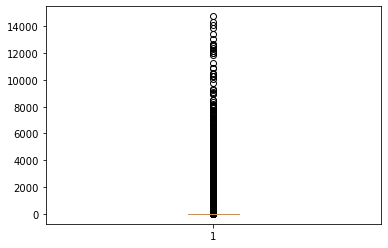

In [45]:
#Box plot --> Device_Count
plt.boxplot(stc_d["DEVICE_COUNT"]);

## Creating the target column --> Performance 

In [46]:
# pinning for DEVICE_COUNT column and store it in performance variable  
        #Extremely poor --> 0-10
        #Poor           --> 10-50
        #Below average --> 50-100
        #Acceptable    --> 100 - 500
        #Good          --> 500 - 1000
        #Very good     --> 1000 - 5000
        #Excellent     --> 5000 - 10000
        #Exceptional   -->1000 - 15000

PERFORMANCE=pd.cut(stc_d["DEVICE_COUNT"],bins=[0,10,50,100,500,1000,5000,10000,15000],
                   labels=['Extremely poor','Poor','Below average','Acceptable','Good','Very good','Excellent','Exceptional'])

stc_d['PERFORMANCE'] = PERFORMANCE

In [47]:
PERFORMANCE

0          Extremely poor
3          Extremely poor
5          Extremely poor
6          Extremely poor
8                    Poor
                ...      
1048568    Extremely poor
1048569    Extremely poor
1048572              Poor
1048573    Extremely poor
1048574     Below average
Name: DEVICE_COUNT, Length: 714002, dtype: category
Categories (8, object): ['Extremely poor' < 'Poor' < 'Below average' < 'Acceptable' < 'Good' < 'Very good' < 'Excellent' < 'Exceptional']

In [48]:
stc_d.head()

,CAL_DT,DEVICE_COUNT,2G_FLG,3G_FLG,4G_FLG,WIFI,BLUETOOTH,TOUCH_SCREEN,DUAL_SIM,GENDER,MODEL,BRAND,VENDOR,OS,DEVICE,AGE,NATIONALITY,SAUDI,PERFORMANCE
0,2019-01-01,9,1,1,1,1,1,1,1,1,510,68,40,0,1,2,168,0,Extremely poor
3,2019-01-01,2,1,1,0,1,1,1,0,1,244,118,68,5,1,0,16,0,Extremely poor
5,2020-01-01,1,1,1,1,1,1,1,1,0,231,186,40,0,1,4,88,0,Extremely poor
6,2019-01-01,1,1,1,0,1,1,1,1,1,794,133,40,0,1,2,62,0,Extremely poor
8,2019-01-01,21,1,1,1,1,1,1,0,1,488,68,40,0,1,1,173,0,Poor


In [49]:
stc_d[stc_d["DEVICE_COUNT"]==12023]

,CAL_DT,DEVICE_COUNT,2G_FLG,3G_FLG,4G_FLG,WIFI,BLUETOOTH,TOUCH_SCREEN,DUAL_SIM,GENDER,MODEL,BRAND,VENDOR,OS,DEVICE,AGE,NATIONALITY,SAUDI,PERFORMANCE
1047194,2020-01-01,12023,1,0,0,0,0,0,1,1,8,118,68,2,0,1,157,1,Exceptional


In [50]:
stc_d['PERFORMANCE'].isnull().sum()

0

In [51]:
stc_d['PERFORMANCE'].isna().sum()

0

In [52]:
stc_d.drop(columns='CAL_DT',axis=1, inplace=True)

## Split the data to train and test

In [53]:
# split the data
training, test = train_test_split(
    stc_d, 
    train_size=0.8, # 80% of data to train
    test_size=0.2, # 20% of data to test
    random_state=42 # so that regardless of how many times I run the code I will have the "exact" points
)

In [54]:
# assining features and target 

target='PERFORMANCE'
X_train = training.drop(columns=stc_d[["PERFORMANCE", "DEVICE_COUNT"]], axis=1)
y_train = training[target]

X_test = test.drop(columns=stc_d[["PERFORMANCE", "DEVICE_COUNT"]], axis=1)
y_test = test[target]

# Classification Models

## (1) Logistic Regression

In [55]:
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
test_dataset = pd.DataFrame(X_test, columns= ['DEVICE_COUNT'])

test_dataset['Actual'] = y_test.to_numpy()
test_dataset['Predict'] = y_pred

test_dataset

,DEVICE_COUNT,Actual,Predict
43186,NaN,Extremely poor,Extremely poor
879529,NaN,Extremely poor,Extremely poor
852964,NaN,Extremely poor,Extremely poor
423568,NaN,Poor,Extremely poor
387874,NaN,Extremely poor,Extremely poor
...,...,...,...
400469,NaN,Extremely poor,Extremely poor
355565,NaN,Extremely poor,Extremely poor
1005471,NaN,Extremely poor,Extremely poor
449718,NaN,Extremely poor,Extremely poor


In [58]:
(test_dataset['Actual'] == test_dataset['Predict']).value_counts()

True     122538
False     20263
dtype: int64

In [59]:
accuracy_score(test_dataset['Actual'],test_dataset['Predict'],normalize=True)

0.8581032345711864

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[     0,      0,      0,      0,   2077,      0,      0,      0],
       [     0,      0,      0,      0,   2645,      0,      0,      0],
       [     0,      0,      0,      0,     15,      0,      0,      0],
       [     0,      0,      0,      0,      5,      0,      0,      0],
       [     0,      0,      0,      0, 122538,      0,      0,      0],
       [     0,      0,      0,      0,    193,      0,      0,      0],
       [     0,      0,      0,      0,  15195,      0,      0,      0],
       [     0,      0,      0,      0,    133,      0,      0,      0]],
      dtype=int64)

In [61]:
#
print(classification_report(y_test, y_pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    Acceptable       0.00      0.00      0.00      2077
 Below average       0.00      0.00      0.00      2645
     Excellent       0.00      0.00      0.00        15
   Exceptional       0.00      0.00      0.00         5
Extremely poor       0.86      1.00      0.92    122538
          Good       0.00      0.00      0.00       193
          Poor       0.00      0.00      0.00     15195
     Very good       0.00      0.00      0.00       133

      accuracy                           0.86    142801
     macro avg       0.11      0.12      0.12    142801
  weighted avg       0.74      0.86      0.79    142801



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression : Tunning 

In [62]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X_train)

In [63]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

In [64]:
pipe = make_pipeline(
    PCA(n_components=5),
    classifier
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8581032345711864

In [65]:
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    Acceptable       0.00      0.00      0.00      2077
 Below average       0.00      0.00      0.00      2645
     Excellent       0.00      0.00      0.00        15
   Exceptional       0.00      0.00      0.00         5
Extremely poor       0.86      1.00      0.92    122538
          Good       0.00      0.00      0.00       193
          Poor       0.00      0.00      0.00     15195
     Very good       0.00      0.00      0.00       133

      accuracy                           0.86    142801
     macro avg       0.11      0.12      0.12    142801
  weighted avg       0.74      0.86      0.79    142801



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## (2) Random Forest Classifier

In [66]:
rfc = RandomForestClassifier(n_estimators=10,random_state=0)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [68]:
rfc_pred = rfc.predict(X_test)

In [69]:
print(classification_report(y_test, rfc_pred))

                precision    recall  f1-score   support

    Acceptable       0.75      0.82      0.79      2077
 Below average       0.67      0.69      0.68      2645
     Excellent       0.47      0.60      0.53        15
   Exceptional       1.00      0.40      0.57         5
Extremely poor       0.98      0.98      0.98    122538
          Good       0.64      0.63      0.64       193
          Poor       0.81      0.81      0.81     15195
     Very good       0.69      0.68      0.69       133

      accuracy                           0.95    142801
     macro avg       0.75      0.70      0.71    142801
  weighted avg       0.95      0.95      0.95    142801



## Random Forest Classifier :Tunning

In [70]:

param_grid = {
    "n_estimators": [10,15,20], 
    "criterion": ["gini", "entropy"], 
    "max_depth": [2,4,6] 
}
grid = GridSearchCV(
    rfc,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 15, 20]},
             verbose=1)

In [71]:
grid.best_score_

0.8575895350305809

In [72]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 10}

In [73]:
grid_pred = grid.predict(X_test)

In [74]:
print(classification_report(y_test, grid_pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    Acceptable       0.00      0.00      0.00      2077
 Below average       0.00      0.00      0.00      2645
     Excellent       0.00      0.00      0.00        15
   Exceptional       0.00      0.00      0.00         5
Extremely poor       0.86      1.00      0.92    122538
          Good       0.00      0.00      0.00       193
          Poor       0.00      0.00      0.00     15195
     Very good       0.00      0.00      0.00       133

      accuracy                           0.86    142801
     macro avg       0.11      0.12      0.12    142801
  weighted avg       0.74      0.86      0.79    142801



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## (3) Decision Tree

In [75]:
# Model Using Entropy
#dtc = Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6)## Set max depth to 6

# fit the model

dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

In [76]:
print(classification_report(y_test, dtc_pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    Acceptable       0.13      0.00      0.01      2077
 Below average       0.12      0.00      0.00      2645
     Excellent       0.00      0.00      0.00        15
   Exceptional       0.00      0.00      0.00         5
Extremely poor       0.86      1.00      0.92    122538
          Good       0.00      0.00      0.00       193
          Poor       0.33      0.00      0.01     15195
     Very good       0.25      0.01      0.01       133

      accuracy                           0.86    142801
     macro avg       0.21      0.13      0.12    142801
  weighted avg       0.78      0.86      0.79    142801



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree :Tunning 

In [77]:

param_grid = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [2,4,6]
}
griddtc = GridSearchCV(
    dtc,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

griddtc.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6]},
             verbose=1)

In [78]:
griddtc.best_score_

0.8577786101551201

In [79]:
# Note: we only choose one possibility --> the one happens first 
griddtc.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [80]:
griddtc_pred=griddtc.predict(X_test)

In [81]:
print(classification_report(y_test, griddtc_pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    Acceptable       0.00      0.00      0.00      2077
 Below average       0.50      0.00      0.00      2645
     Excellent       0.00      0.00      0.00        15
   Exceptional       0.00      0.00      0.00         5
Extremely poor       0.86      1.00      0.92    122538
          Good       0.00      0.00      0.00       193
          Poor       0.32      0.01      0.02     15195
     Very good       0.20      0.01      0.01       133

      accuracy                           0.86    142801
     macro avg       0.23      0.13      0.12    142801
  weighted avg       0.78      0.86      0.79    142801



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## (4) XGBoost

In [82]:
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:20:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [83]:
y_pred_XGB = XGB_Classifier.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred_XGB))

                precision    recall  f1-score   support

    Acceptable       0.68      0.30      0.42      2077
 Below average       0.64      0.06      0.11      2645
     Excellent       0.38      0.20      0.26        15
   Exceptional       1.00      0.60      0.75         5
Extremely poor       0.90      0.99      0.94    122538
          Good       0.58      0.17      0.26       193
          Poor       0.51      0.22      0.31     15195
     Very good       0.62      0.59      0.60       133

      accuracy                           0.88    142801
     macro avg       0.66      0.39      0.46    142801
  weighted avg       0.85      0.88      0.85    142801



##  XGBoost :Tunning 

In [85]:
params = {
    'n_estimators': [20, 50],
    'learning_rate': [0.01,0.05]
    #'booster': ['gbtree'],
    #'gamma': [0, 0.5],
    #'reg_alpha': [0, 0.5],
    #'reg_lambda': [0.5, 1],
    #'base_score': [0.2, 0.5]
}

In [86]:
grid2 = GridSearchCV(
    XGB_Classifier,
    params,
    cv = 5,
    n_jobs=-1,
    verbose=1
)
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:45:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=0,
                                     reg_al

In [87]:
grid2.best_params_

{'learning_rate': 0.05, 'n_estimators': 20}

In [88]:
grid2.best_score_

0.8581900243225065

In [89]:
grid2_pred = grid2.predict(X_test)

In [90]:
print(classification_report(y_test, grid2_pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

    Acceptable       0.20      0.00      0.00      2077
 Below average       0.61      0.01      0.01      2645
     Excellent       0.00      0.00      0.00        15
   Exceptional       0.00      0.00      0.00         5
Extremely poor       0.86      1.00      0.92    122538
          Good       0.50      0.01      0.02       193
          Poor       0.41      0.01      0.03     15195
     Very good       0.20      0.02      0.03       133

      accuracy                           0.86    142801
     macro avg       0.35      0.13      0.13    142801
  weighted avg       0.80      0.86      0.80    142801



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Creating pipelines for the best models:

#### Before tuning:

In [91]:
#Pipeline for the random forest classifier model:
piperfc = make_pipeline(
    StandardScaler(),
    rfc
)

piperfc.fit(X_train, y_train)
piperfc.score(X_test, y_test)

0.9501894244438064

#### After tuning:

In [94]:
#Pipeline for the XGBoost model after tuning:
pipeXGB = make_pipeline(
    StandardScaler(),
    XGBClassifier(learning_rate= 0.05, n_estimators= 20)
)

pipeXGB.fit(X_train, y_train)
pipeXGB.score(X_test, y_test)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:53:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8587474877626907

## Saving the models using pickle:

In [95]:
# use pickle
#The best model before
rf = 'RandomForestModel.sav'
pickle.dump(piperfc, open(rf, 'wb'))
#The best model after tuning
xg = 'XGBoostModel.sav'
pickle.dump(pipeXGB, open(xg, 'wb'))
#The label encoder that we used
en = 'LabelEncoder.sav'
pickle.dump(le, open(en, 'wb'))

NameError: name 'pickle' is not defined

In [ ]:
encoder = pickle.load(open(e, 'rb'))
aftermodel = pickle.load(open(xg, 'rb'))
beformodel = pickle.load(open(rf, 'rb'))